In [102]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [103]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [104]:
pip install matplotlib

A. 데이터 전처리 - 데이터 읽어오기

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [106]:
csv_path = "NFLX.csv"
df = pd.read_csv(csv_path)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


B. 데이터 전처리 - 2021년 이후의 종가 데이터 출력하기

In [107]:

df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

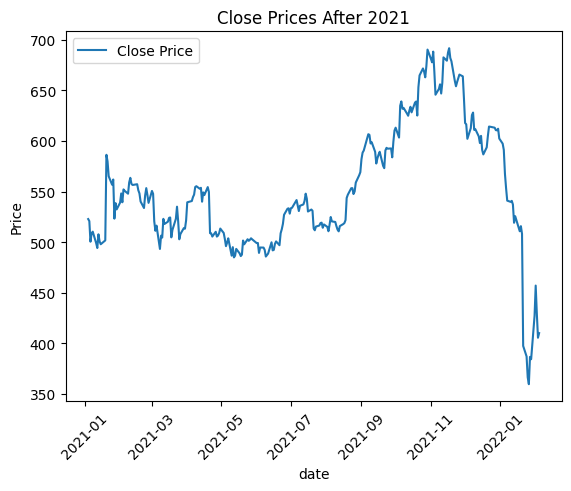

In [108]:
df_after_2021 = df[df['Date'] > "2020-12-31"]

plt.title('Close Prices After 2021')
plt.plot(df_after_2021['Date'],df_after_2021['Close'],label = 'Close Price')
plt.xlabel("date")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.legend()
plt.show()

C. 데이터 분석 - 2021년 이후 최고, 최저가 출력하기

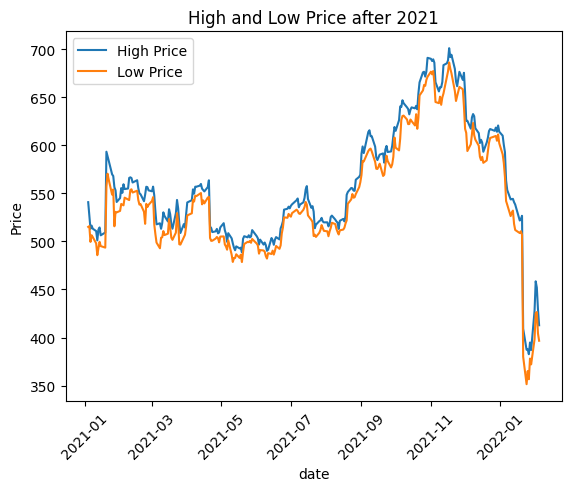

In [112]:
plt.title("High and Low Price after 2021")
plt.plot(df_after_2021["Date"], df_after_2021["High"], label = "High Price")
plt.plot(df_after_2021["Date"], df_after_2021["Low"], label = "Low Price")
plt.xlabel("date")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [114]:
max_price = max(df_after_2021["Close"])
min_price = min(df_after_2021["Close"])
print(f"최고 종가: {max_price:.2f}")
print(f"최저 종가: {min_price:.2f}")

최고 종가: 691.69
최저 종가: 359.70


D. 데이터 분석 - 2021년 이후 월 별 평균 종가 출력하기

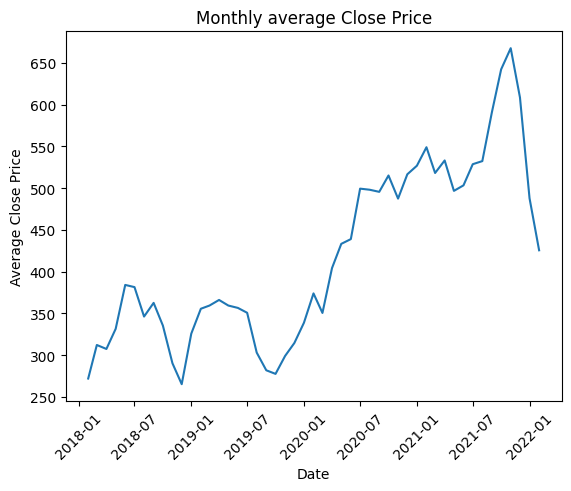

In [131]:
# 월별 평균 종가 게산
monthly_avg_close = df.groupby(df['Date'].dt.to_period('M')).mean(numeric_only= True)

# 행이 변경되었으므로, 다시 변경
monthly_avg_close.reset_index(inplace=True)

#'Date'를 datetime 형식으로 변환
monthly_avg_close['Date'] = monthly_avg_close['Date'].dt.to_timestamp()

plt.plot(monthly_avg_close['Date'],monthly_avg_close['Close'])
plt.title('Monthly average Close Price')
plt.xlabel("Date")
plt.ylabel("Average Close Price")
plt.xticks(rotation = 45)
plt.show()

E. 데이터 시각화 - 2022년 이후 최고, 최저, 종가 시각화하기

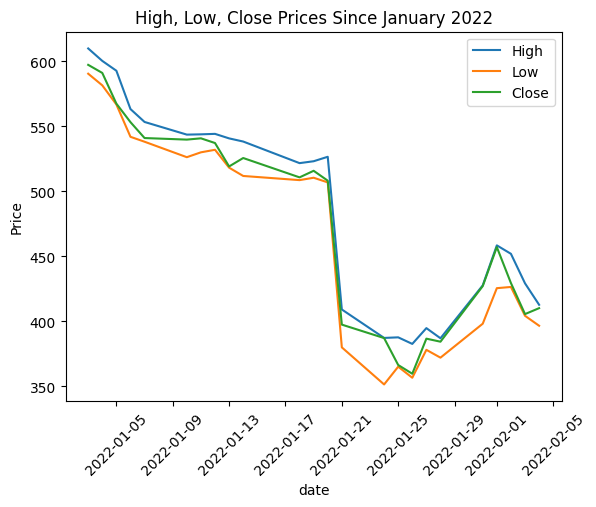

In [127]:
df_after_2022 = df[df['Date'] > "2021-12-31"]
plt.title('High, Low, Close Prices Since January 2022')
plt.plot(df_after_2022['Date'],df_after_2022['High'],label = 'High')
plt.plot(df_after_2022['Date'],df_after_2022['Low'],label = 'Low')
plt.plot(df_after_2022['Date'],df_after_2022['Close'],label = 'Close')
plt.xlabel("date")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.legend()
plt.show()